# **Прикладные задачи нелинейной динамики**
## **Лабораторная работа №1. Исследование нелинейных систем дифференциальных уравнений**
### **Часть 1. Ангармонический осциллятор в отсутствие трения**

Ангармонический осциллятор в отсутсвие трения описывается ОДУ следующего вида:
$$
\overset{\cdot \cdot}{x} + \omega^2 \cdot x = 0
$$

В следствие чего данное уравнение можно переписать в виде системы 2-го порядка:
$$
\left\{
\begin{array}{cc}
\cfrac{dx}{dt} &= p \\
\cfrac{dp}{dt} &= -\omega^2 \cdot x
\end{array}
\right.
$$


In [67]:
import scipy.integrate as integr            # Набор функций для решения дифференциальных уравнений
import numpy as np                          # Библиотека работы с матрицами
import matplotlib.pyplot as plt              # Графика в python

colors = ["#00FFFF",                # Azure
          "#0000FF",                # Blue
          "#FF0000",                # Red
          "#00FF00",                # Green
          "#D2691E",                #
          "#AAA662",
          "#9A0EEA",
          "#808000",
          "#FFA500",
          "#9ACD32",
          "#ED0DD9",
          "#FC5A50",
          "#929591",
          "#029386",
          "#C79FEF",
          "#FAC205",
          "#6E750E",
          "#06C2AC",
          "#CD5C5C",                # IndianRed
          "#A52A2A",                # Brown
          "#7B68EE",                # MediumState_blue
          "#4682B4",                # SteelBlue
          "#800000"                # Maroon
          ]

colors.extend(colors)
colors.extend(colors)

# функция отрисовки линии по наклону и пересечению
def abline(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, c = "black")

# Функция составления сетки из представленных дискретных значений в списках
def mesh(x, y):
    general = []
    for i in range(len(x)):
        for j in range(len(y)):
            local = []
            local.append(x[i])
            local.append(y[j])
            general.append(local)
    return general

In [68]:
# Зададим функцию системы
def f(y, t, omega = 1):
    y1, y2 = y
    return [y2, -1 * omega**2 * y1]

time = np.linspace(0, 5, 50)        # Вектор времени
y0 = [0, 2]                         # Начальные значения для координаты и скорости

# Решение системы
w = integr.odeint(f,            # Функция реализующая систему       
                  y0,           # Начальная точка
                  time,         # Вектор времени
                  (3, )         # Дополнительный параметр omega
                  )

y1 = w[:, 0]            # Вектор x
y2 = w[:, 1]            # Вектор p

Визуализация полученных решений на языке Python с применением библиотеки matplotlib.pyplot

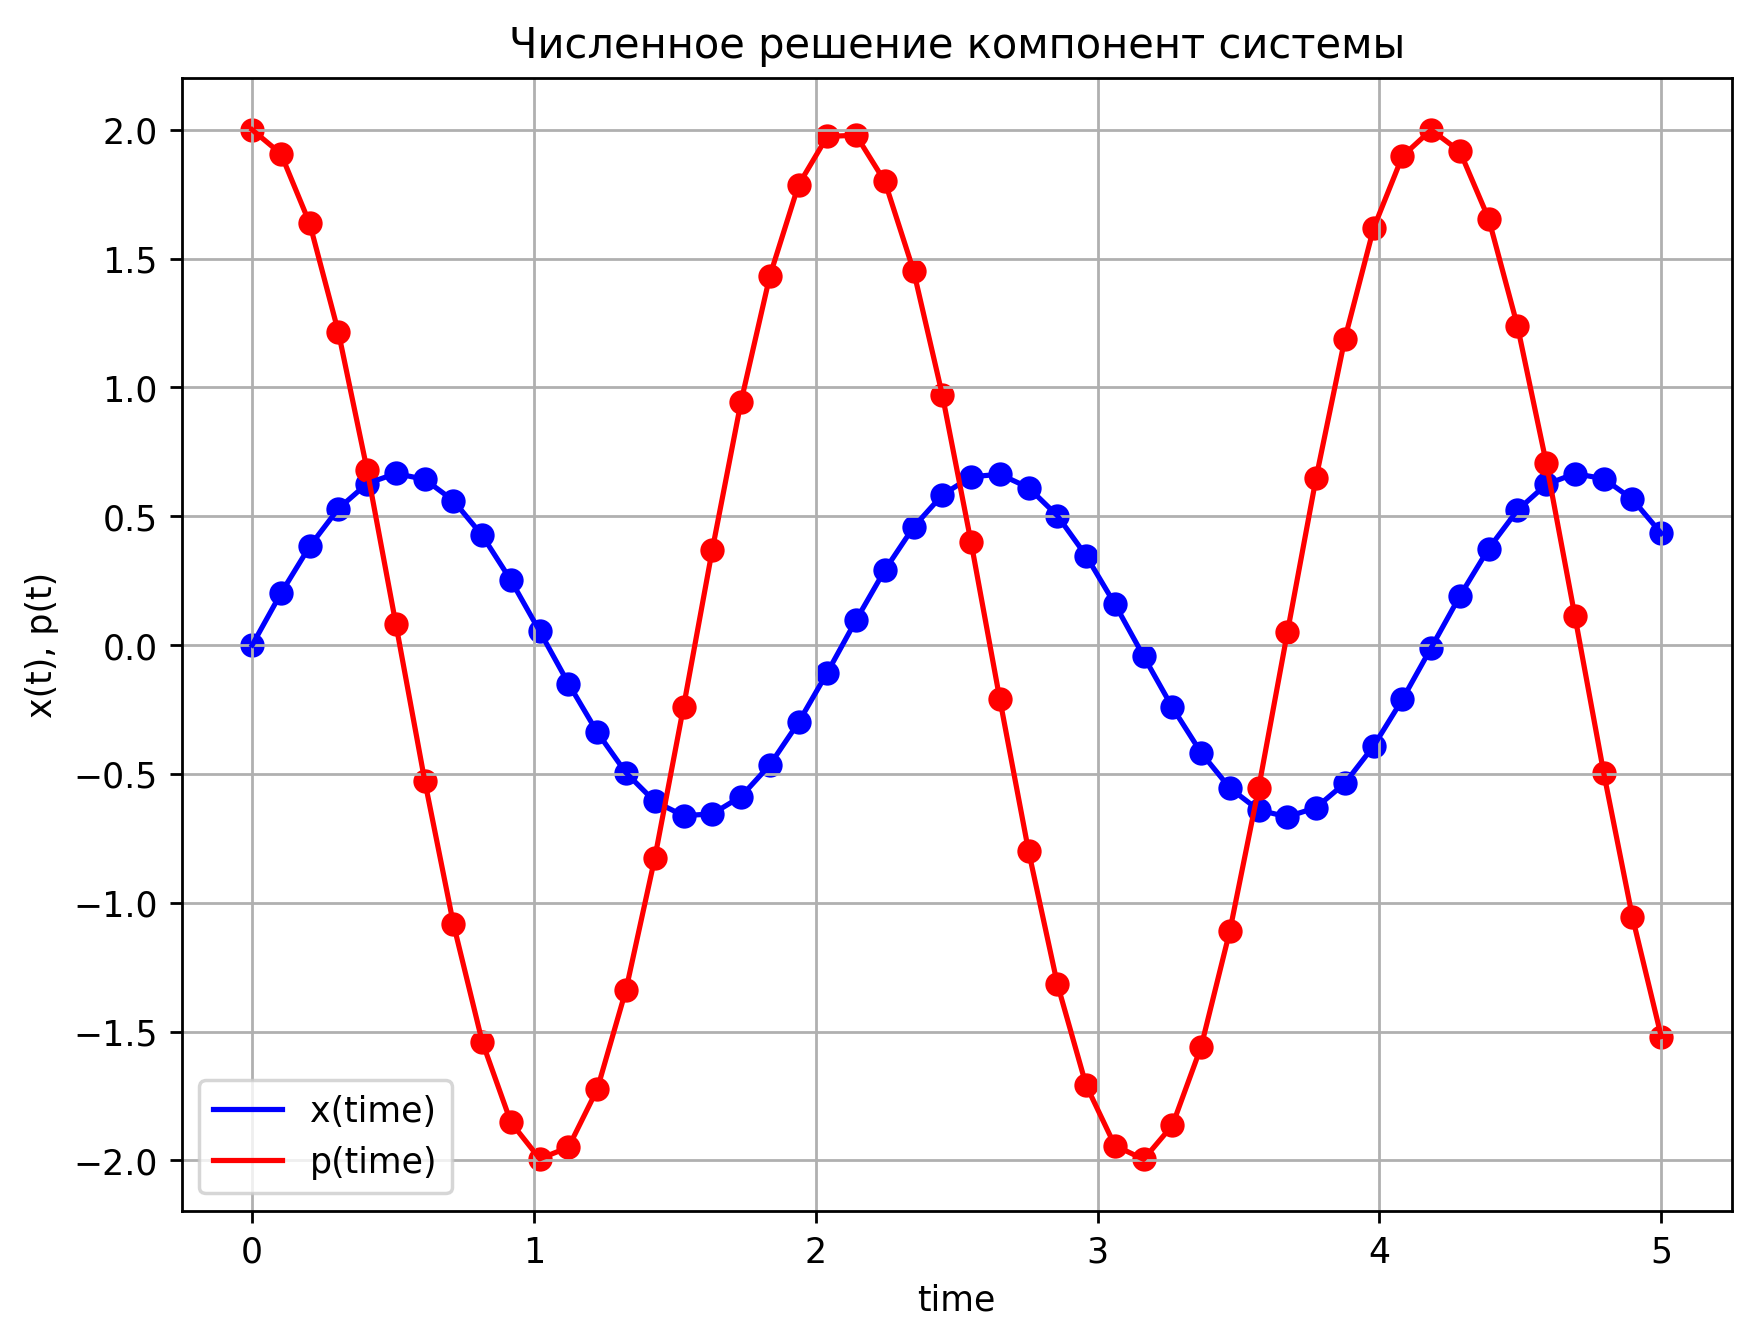

In [69]:
# Инициализация холста и его цвета
fig = plt.figure(facecolor="white", figsize = (8, 6), dpi=250)

# Рисование линии численного решения для функции координаты маятника во времени
plt.plot(time, y1, c = "b", label = "x(time)")     # Отрисовка линии (t, x(t))
plt.scatter(time, y1, c = "b")                      # Отрисовка точек (t, x(t))

# Рисование линии численного решения для функции скорости маятника во времени
plt.plot(time, y2, c = "r", label = "p(time)")     # Отрисовка линии (t, p(t))
plt.scatter(time, y2, c = "r")                      # Отрисовка точек (t, p(t))

# Подписи к графику
plt.xlabel("time")          # По оси абсцисс
plt.ylabel("x(t), p(t)")    # По оси ординат
plt.title("Численное решение компонент системы")
plt.legend()

plt.grid(True)              # Показать сетку
plt.show()                  # Собственно показать построенный график

Отрисовка фазового портрета для численного решения системы


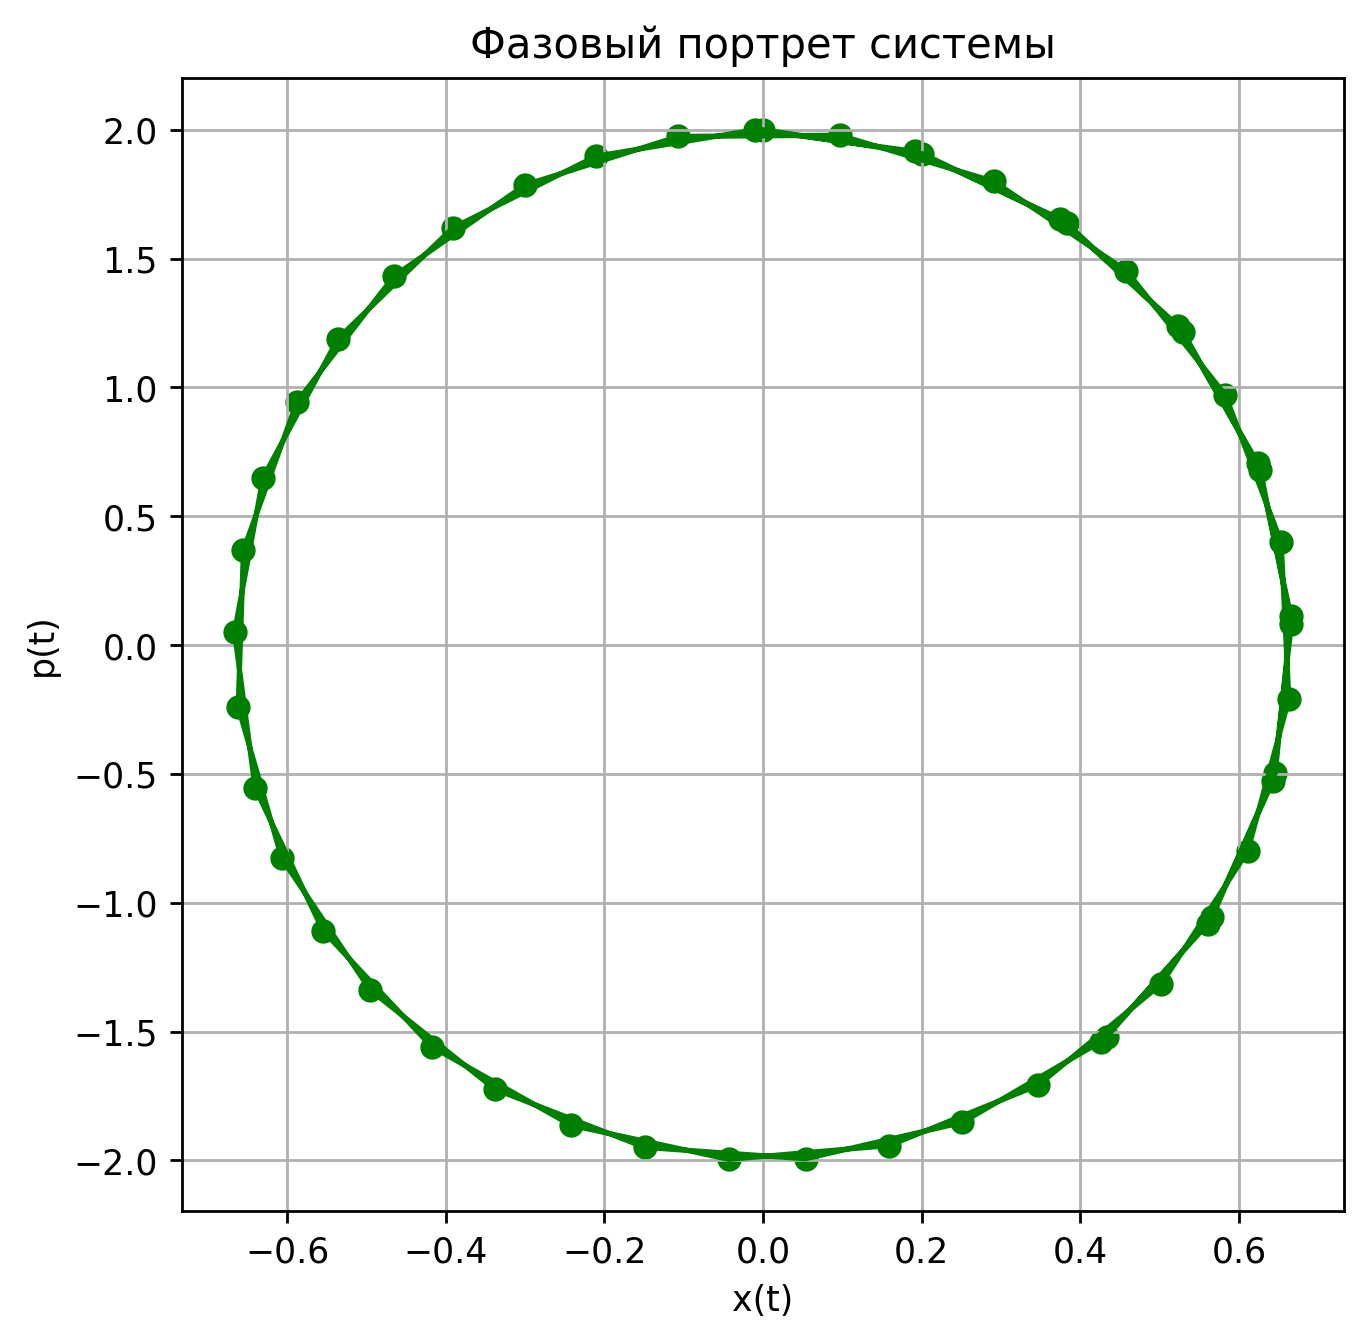

In [70]:
fig = plt.figure(facecolor="white", figsize=(6,6), dpi=250)

# Линия фазового портрета системы
plt.plot(y1, y2, c = "g")
plt.scatter(y1, y2, c = "g")

# Подписи к графику
plt.xlabel("x(t)")
plt.ylabel("p(t)")
plt.title("Фазовый портрет системы")

plt.grid(True)
plt.show()


Численное решение системы с разными начальными точками для задачи Коши

In [71]:
time = np.linspace(0, 5, 100)        # Вектор времени
y0_init = [[0, 2], [0, 3], [0, 4],
           [2, 0], [3, 0], [4, 0],
           [2, 2], [3, 3], [4, 4]]   # Начальные значения для координаты и скорости

W_global = []
# Решение системы
for y0 in y0_init:
    W_global.append(
        integr.odeint(f,            # Функция реализующая систему       
                      y0,           # Начальная точка
                      time,         # Вектор времени
                      (3, )         # Дополнительный параметр omega
                      )
    )

y1 = W_global[0][:, 0]            # Вектор x
y2 = W_global[0][:, 1]            # Вектор p

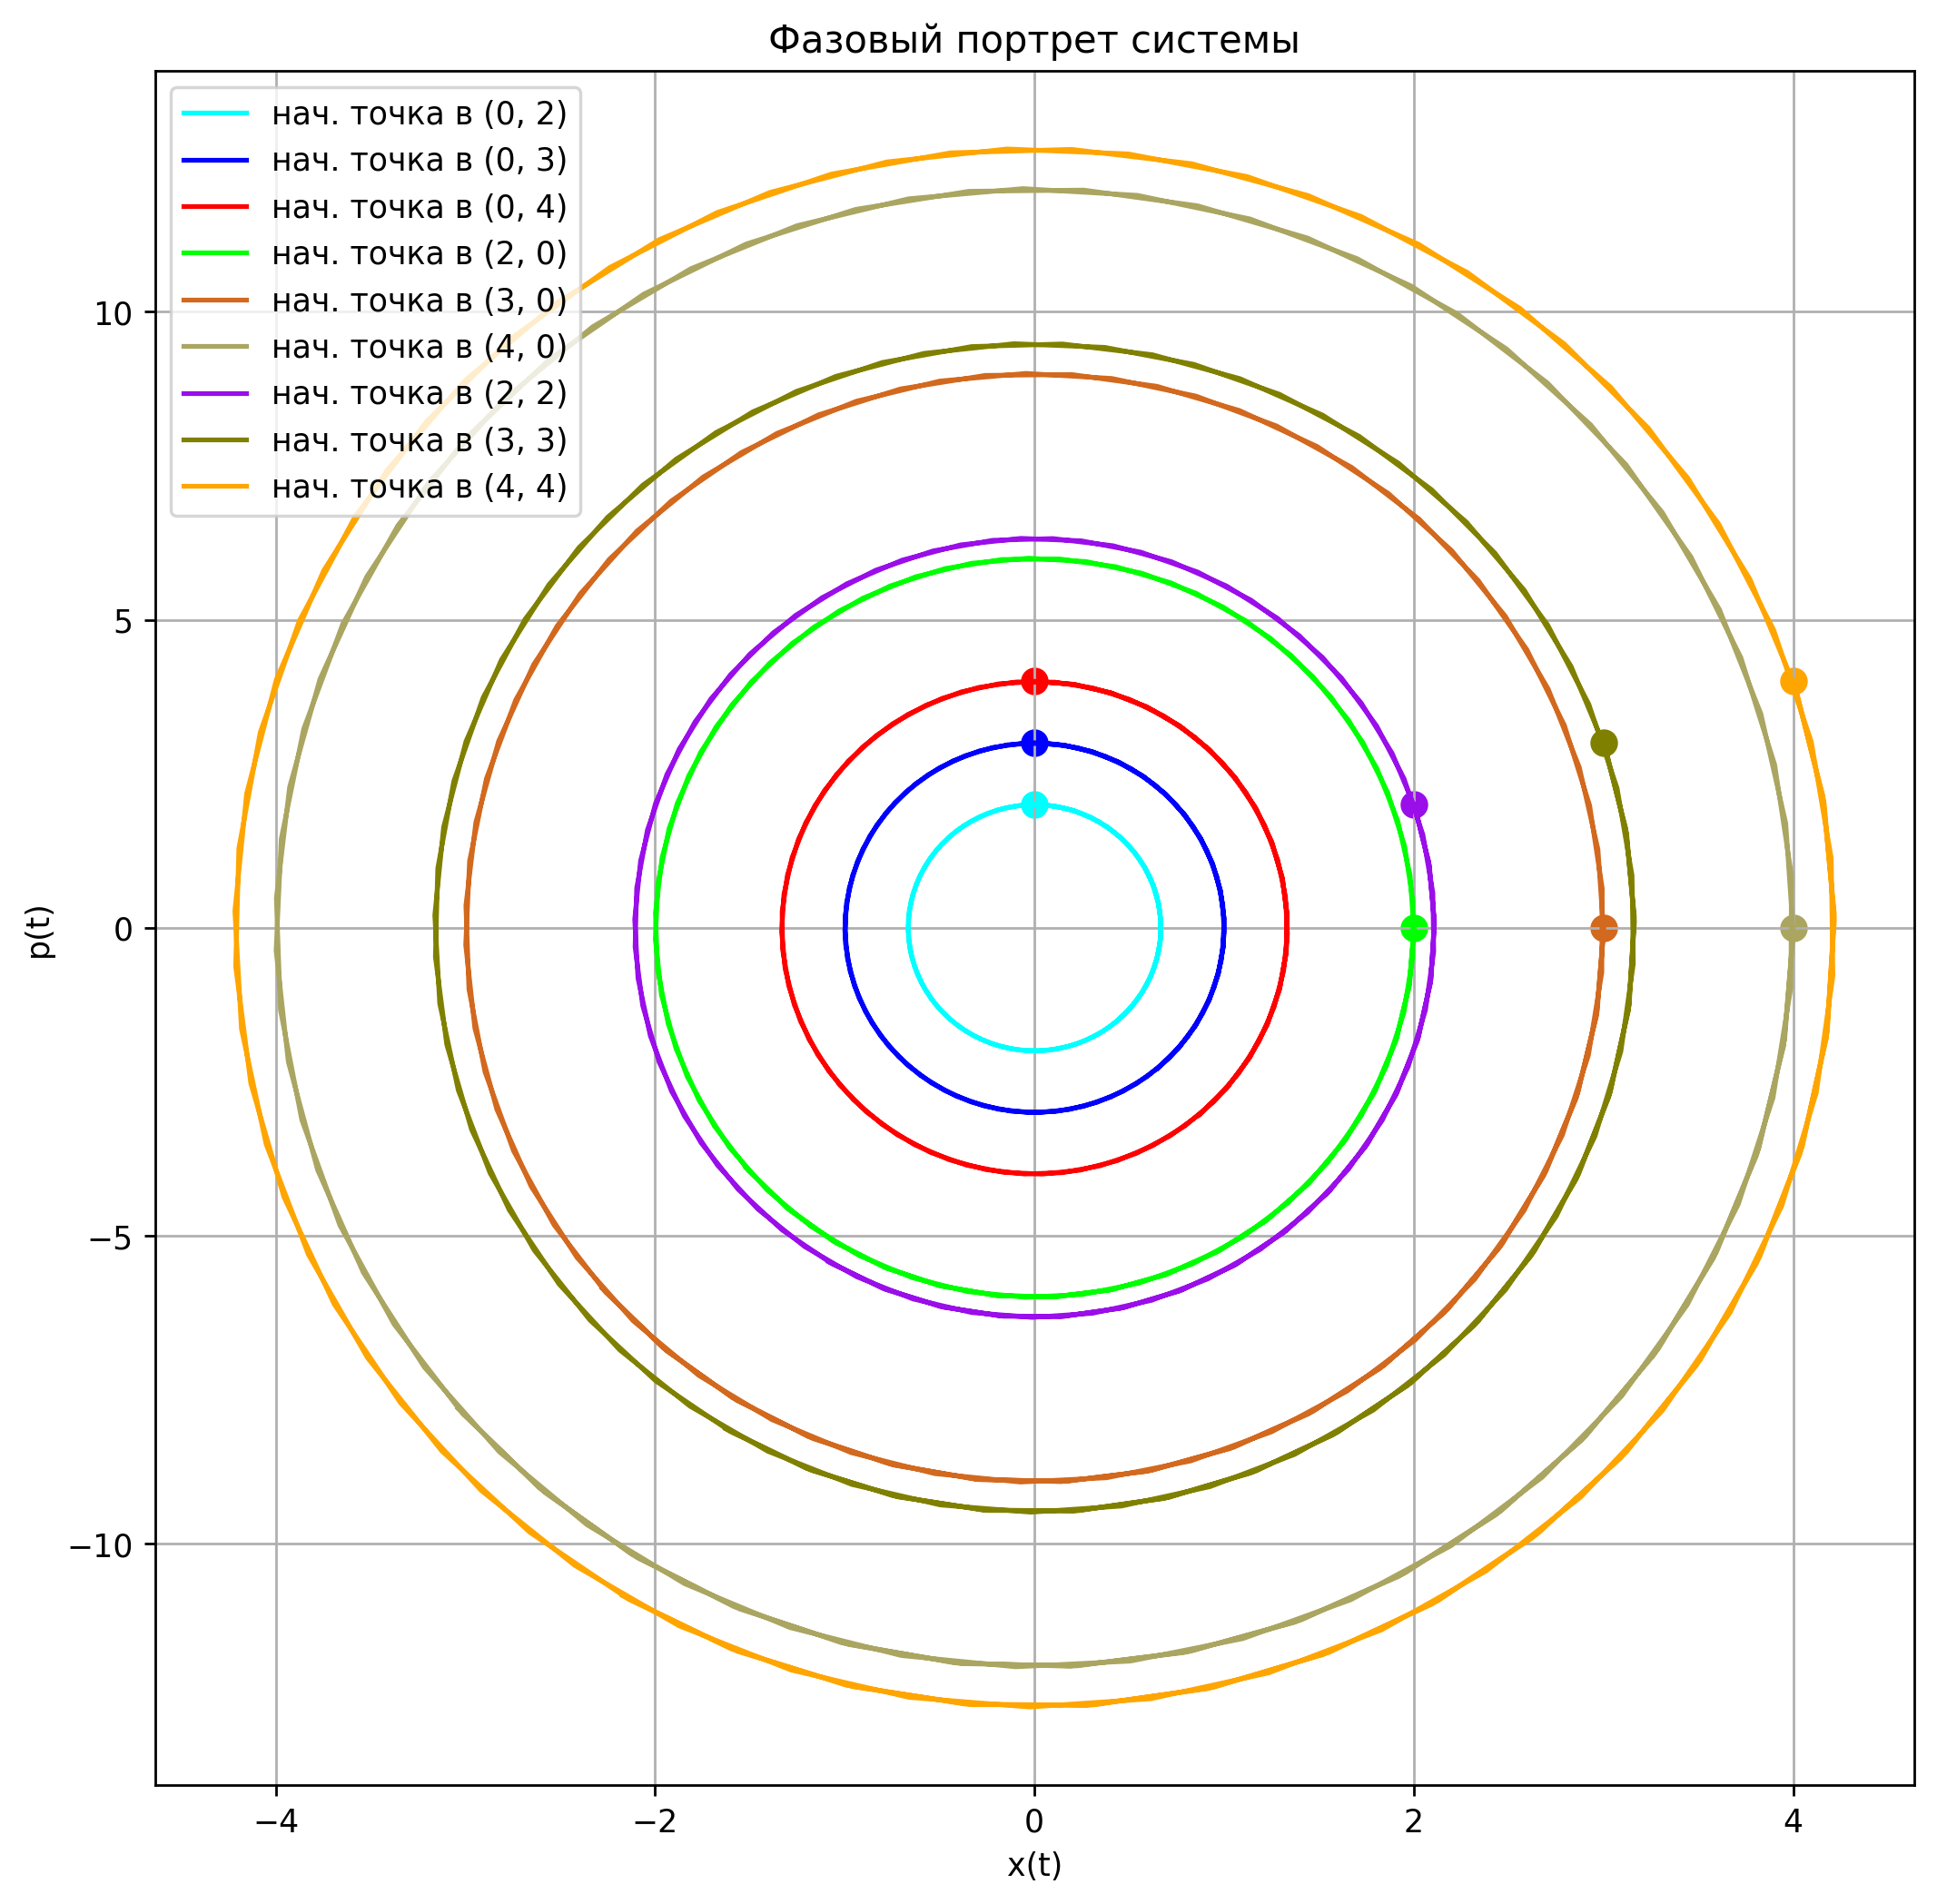

In [72]:
fig = plt.figure(facecolor="white", figsize=(10, 10), dpi=250)

# Линии фазового портрета системы
for line_number in range(len(y0_init)):
    # Из коллекции решений выбираем по-одному
    y1 = W_global[line_number][:, 0]
    y2 = W_global[line_number][:, 1]
    # Рисуем линию
    plt.plot(y1, y2, c = colors[line_number], 
                    label = ("нач. точка в (" + 
                              str(y0_init[line_number][0]) + ", " +
                              str(y0_init[line_number][1]) + ")"))
    # Отмечаем начальную точку на графике
    plt.scatter(y1[0], y2[0], c = colors[line_number], s = 60)

# Подписи к графику
plt.xlabel("x(t)")
plt.ylabel("p(t)")
plt.title("Фазовый портрет системы")
plt.legend()

plt.grid(True)
plt.show()

### **Часть 2. Гармонический осциллятор в отсутствие трения**

Уравнение для гармонического осциллятора в остутствие трения записывается в следующем виде:

$$
\overset{\cdot \cdot}{x} + \omega^2 sin(x) = 0
$$

Что в виде системы записывается как:
$$
\left\{
\begin{array}{cc}
\cfrac{dx}{dt} &= p \\
\cfrac{dp}{dt} &= -\omega^2 \cdot sin(x)
\end{array}
\right.
$$


Линеаризованная система при k = 1:

$$
\left\{
\begin{array}{cc}
\cfrac{dx}{dt} &= p \\
\cfrac{dp}{dt} &= \omega^2 \cdot x
\end{array}
\right.
$$

Матрица системы имеет вид:

$$
A = \left( 
    \begin{array}{cc}
    0 & 1 \\
    \omega^2 & 0
    \end{array}
    \right)
$$

Собственные значения:

$$
\lambda^2 - \omega^2 * 1 = 0
$$

$$
\lambda_{1,2} = \pm \omega \in R
$$

$$
\lambda_{1} > 0\text{,  } \lambda_{2} < 0
$$

Сепаратрисы определяются исходя из уравнений:

$$
(a - \lambda_{1,2})\cdot x + b\cdot y = 0
$$
$$
c\cdot x + (d - \lambda_{1, 2})\cdot y = 0
$$

In [73]:
# Зададим функцию системы
def f(y, t, omega = 1):
    y1, y2 = y
    return [y2, -1 * omega**2 * np.sin(y1)]

time = np.linspace(0, 8, 150)        # Вектор времени
omega0 = 3
# Определим начальные точки для построения траекторий движения решений
# И для построения итоговой общей фазовой плоскости
# Начальные значения для координаты и скорости
y0_init = [[0.5, 0.5],  # близко к точке покоя (0, 0)
           [1, 1],      
           [1.5, 1.5],
           [2, 2],            
           [2.3, 2.3],       
           [0.5 + 2 * np.pi, 0.5],
           [1 + 2 * np.pi, 1],
           [1.5 + 2 * np.pi, 1.5],
           [2 + 2 * np.pi, 2],
           [2.3 + 2 * np.pi, 2.3],
           [0.5 - 2 * np.pi, 0.5],
           [1 - 2 * np.pi, 1],
           [1.5 - 2 * np.pi, 1.5],
           [2 - 2 * np.pi, 2],
           [2.3 - 2 * np.pi, 2.3],
           [2.4 - 4 * np.pi, 2.4],
           [3 - 6 * np.pi, 3],
           [2.4 + 4 * np.pi, -2.4]]
           
W_global = []
# Решение системы
for y0 in y0_init:
    W_global.append(
        integr.odeint(f,            # Функция реализующая систему       
                      y0,           # Начальная точка
                      time,         # Вектор времени
                      (omega0, )         # Дополнительный параметр omega
                      )
    )

y1 = W_global[0][:, 0]            # Вектор x
y2 = W_global[0][:, 1]            # Вектор p

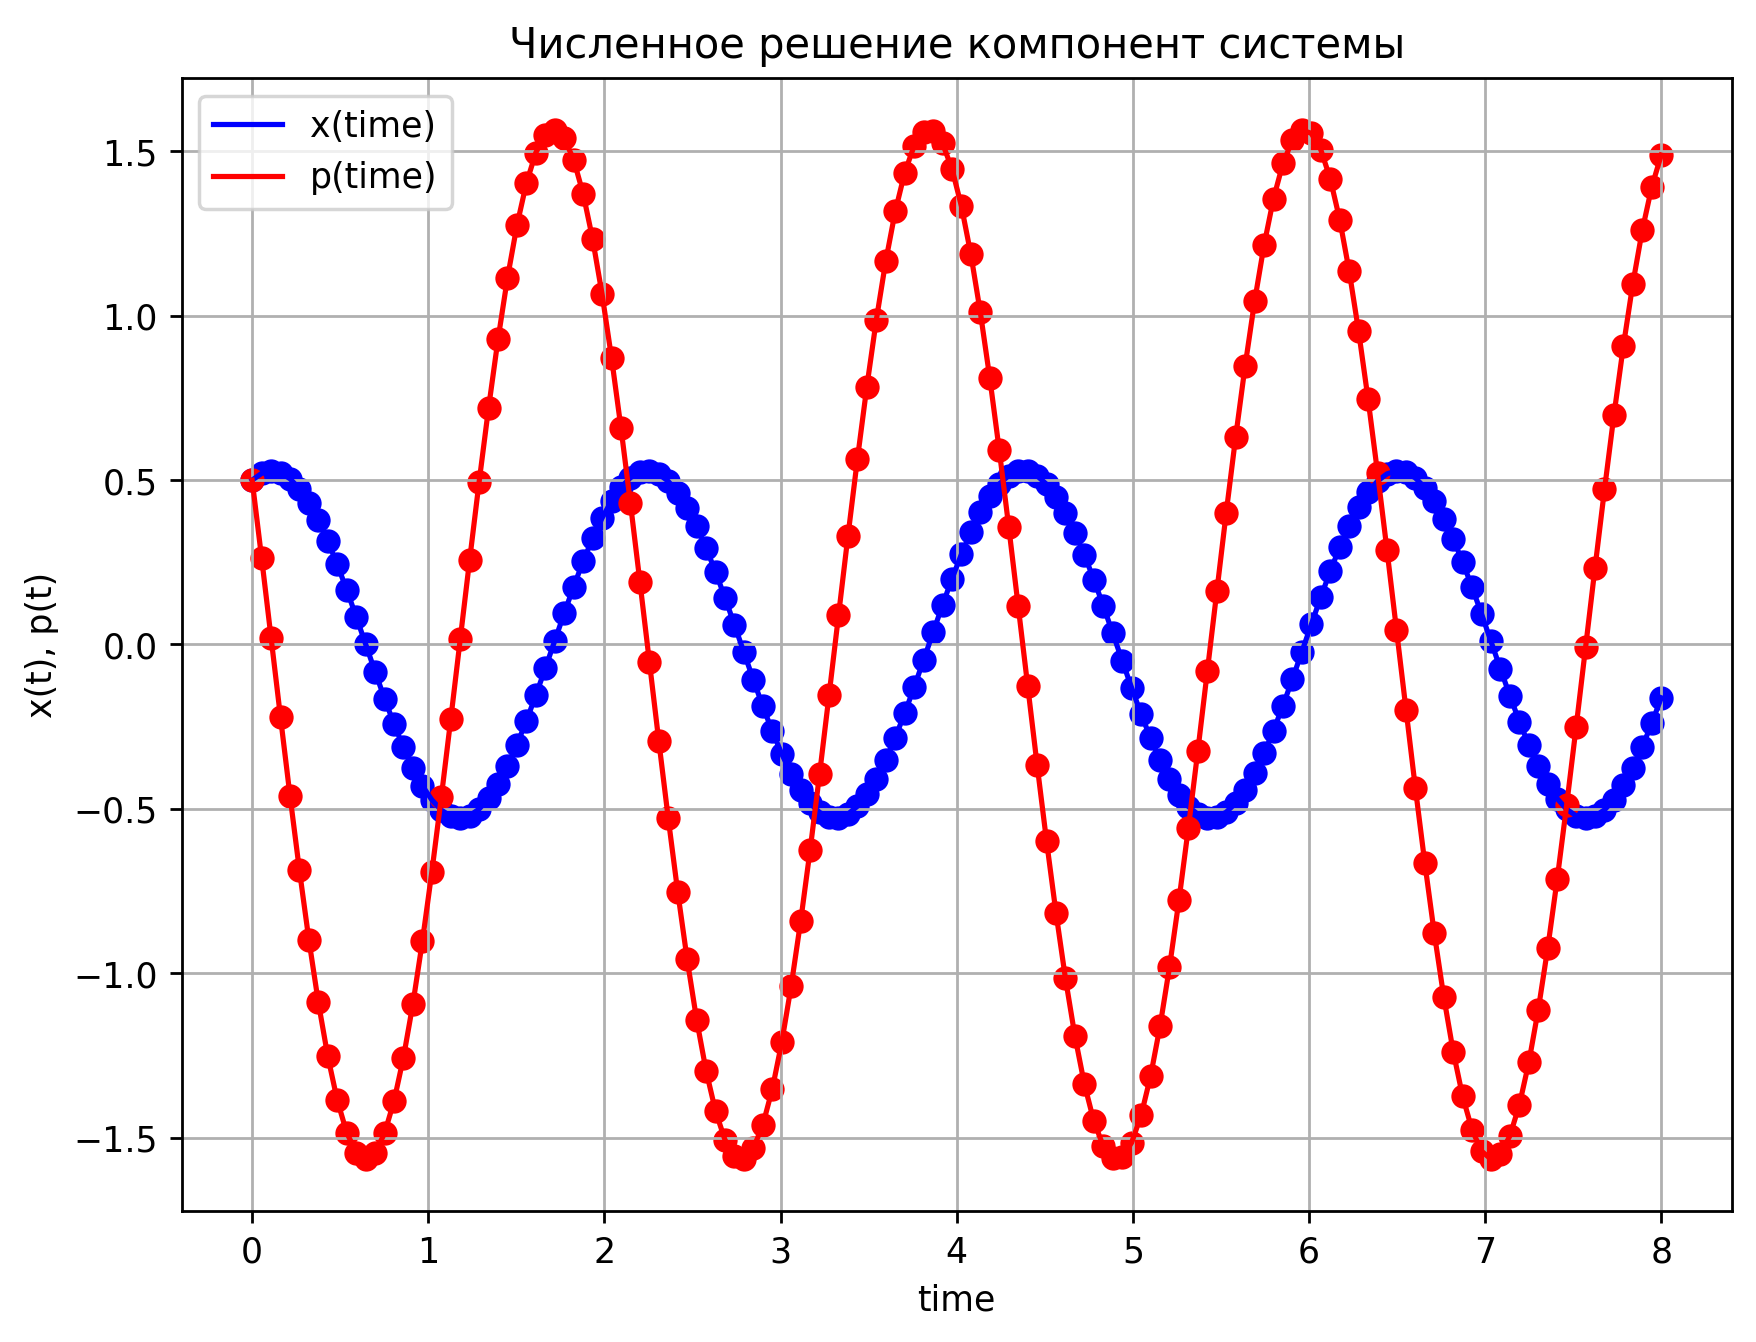

In [74]:
# Инициализация холста и его цвета
fig = plt.figure(facecolor="white", figsize = (8, 6), dpi=250)

# Рисование линии численного решения для функции координаты маятника во времени
plt.plot(time, y1, c = "b", label = "x(time)")     # Отрисовка линии (t, x(t))
plt.scatter(time, y1, c = "b")                      # Отрисовка точек (t, x(t))

# Рисование линии численного решения для функции скорости маятника во времени
plt.plot(time, y2, c = "r", label = "p(time)")     # Отрисовка линии (t, p(t))
plt.scatter(time, y2, c = "r")                      # Отрисовка точек (t, p(t))

# Подписи к графику
plt.xlabel("time")          # По оси абсцисс
plt.ylabel("x(t), p(t)")    # По оси ординат
plt.title("Численное решение компонент системы")
plt.legend()

plt.grid(True)              # Показать сетку
plt.show()                  # Собственно показать построенный график


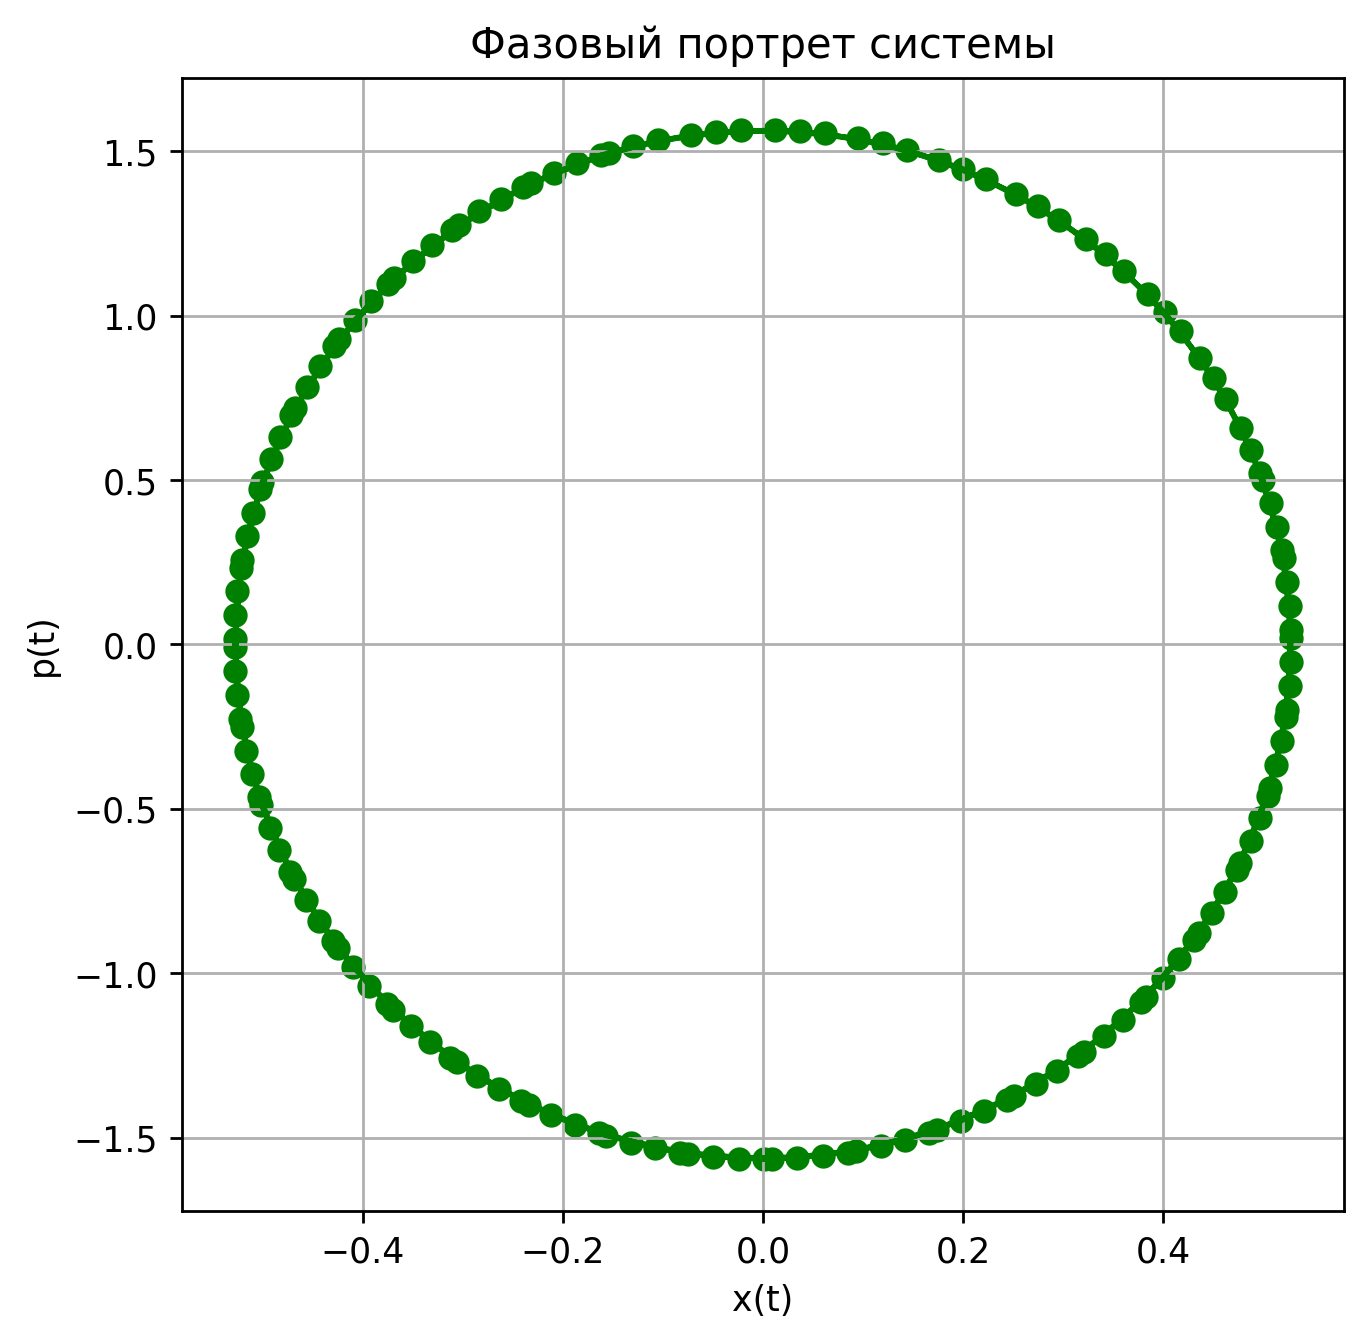

In [75]:
fig = plt.figure(facecolor="white", figsize=(6,6), dpi=250)

# Линия фазового портрета системы
plt.plot(y1, y2, c = "g")
plt.scatter(y1, y2, c = "g")

# Подписи к графику
plt.xlabel("x(t)")
plt.ylabel("p(t)")
plt.title("Фазовый портрет системы")

plt.grid(True)
plt.show()


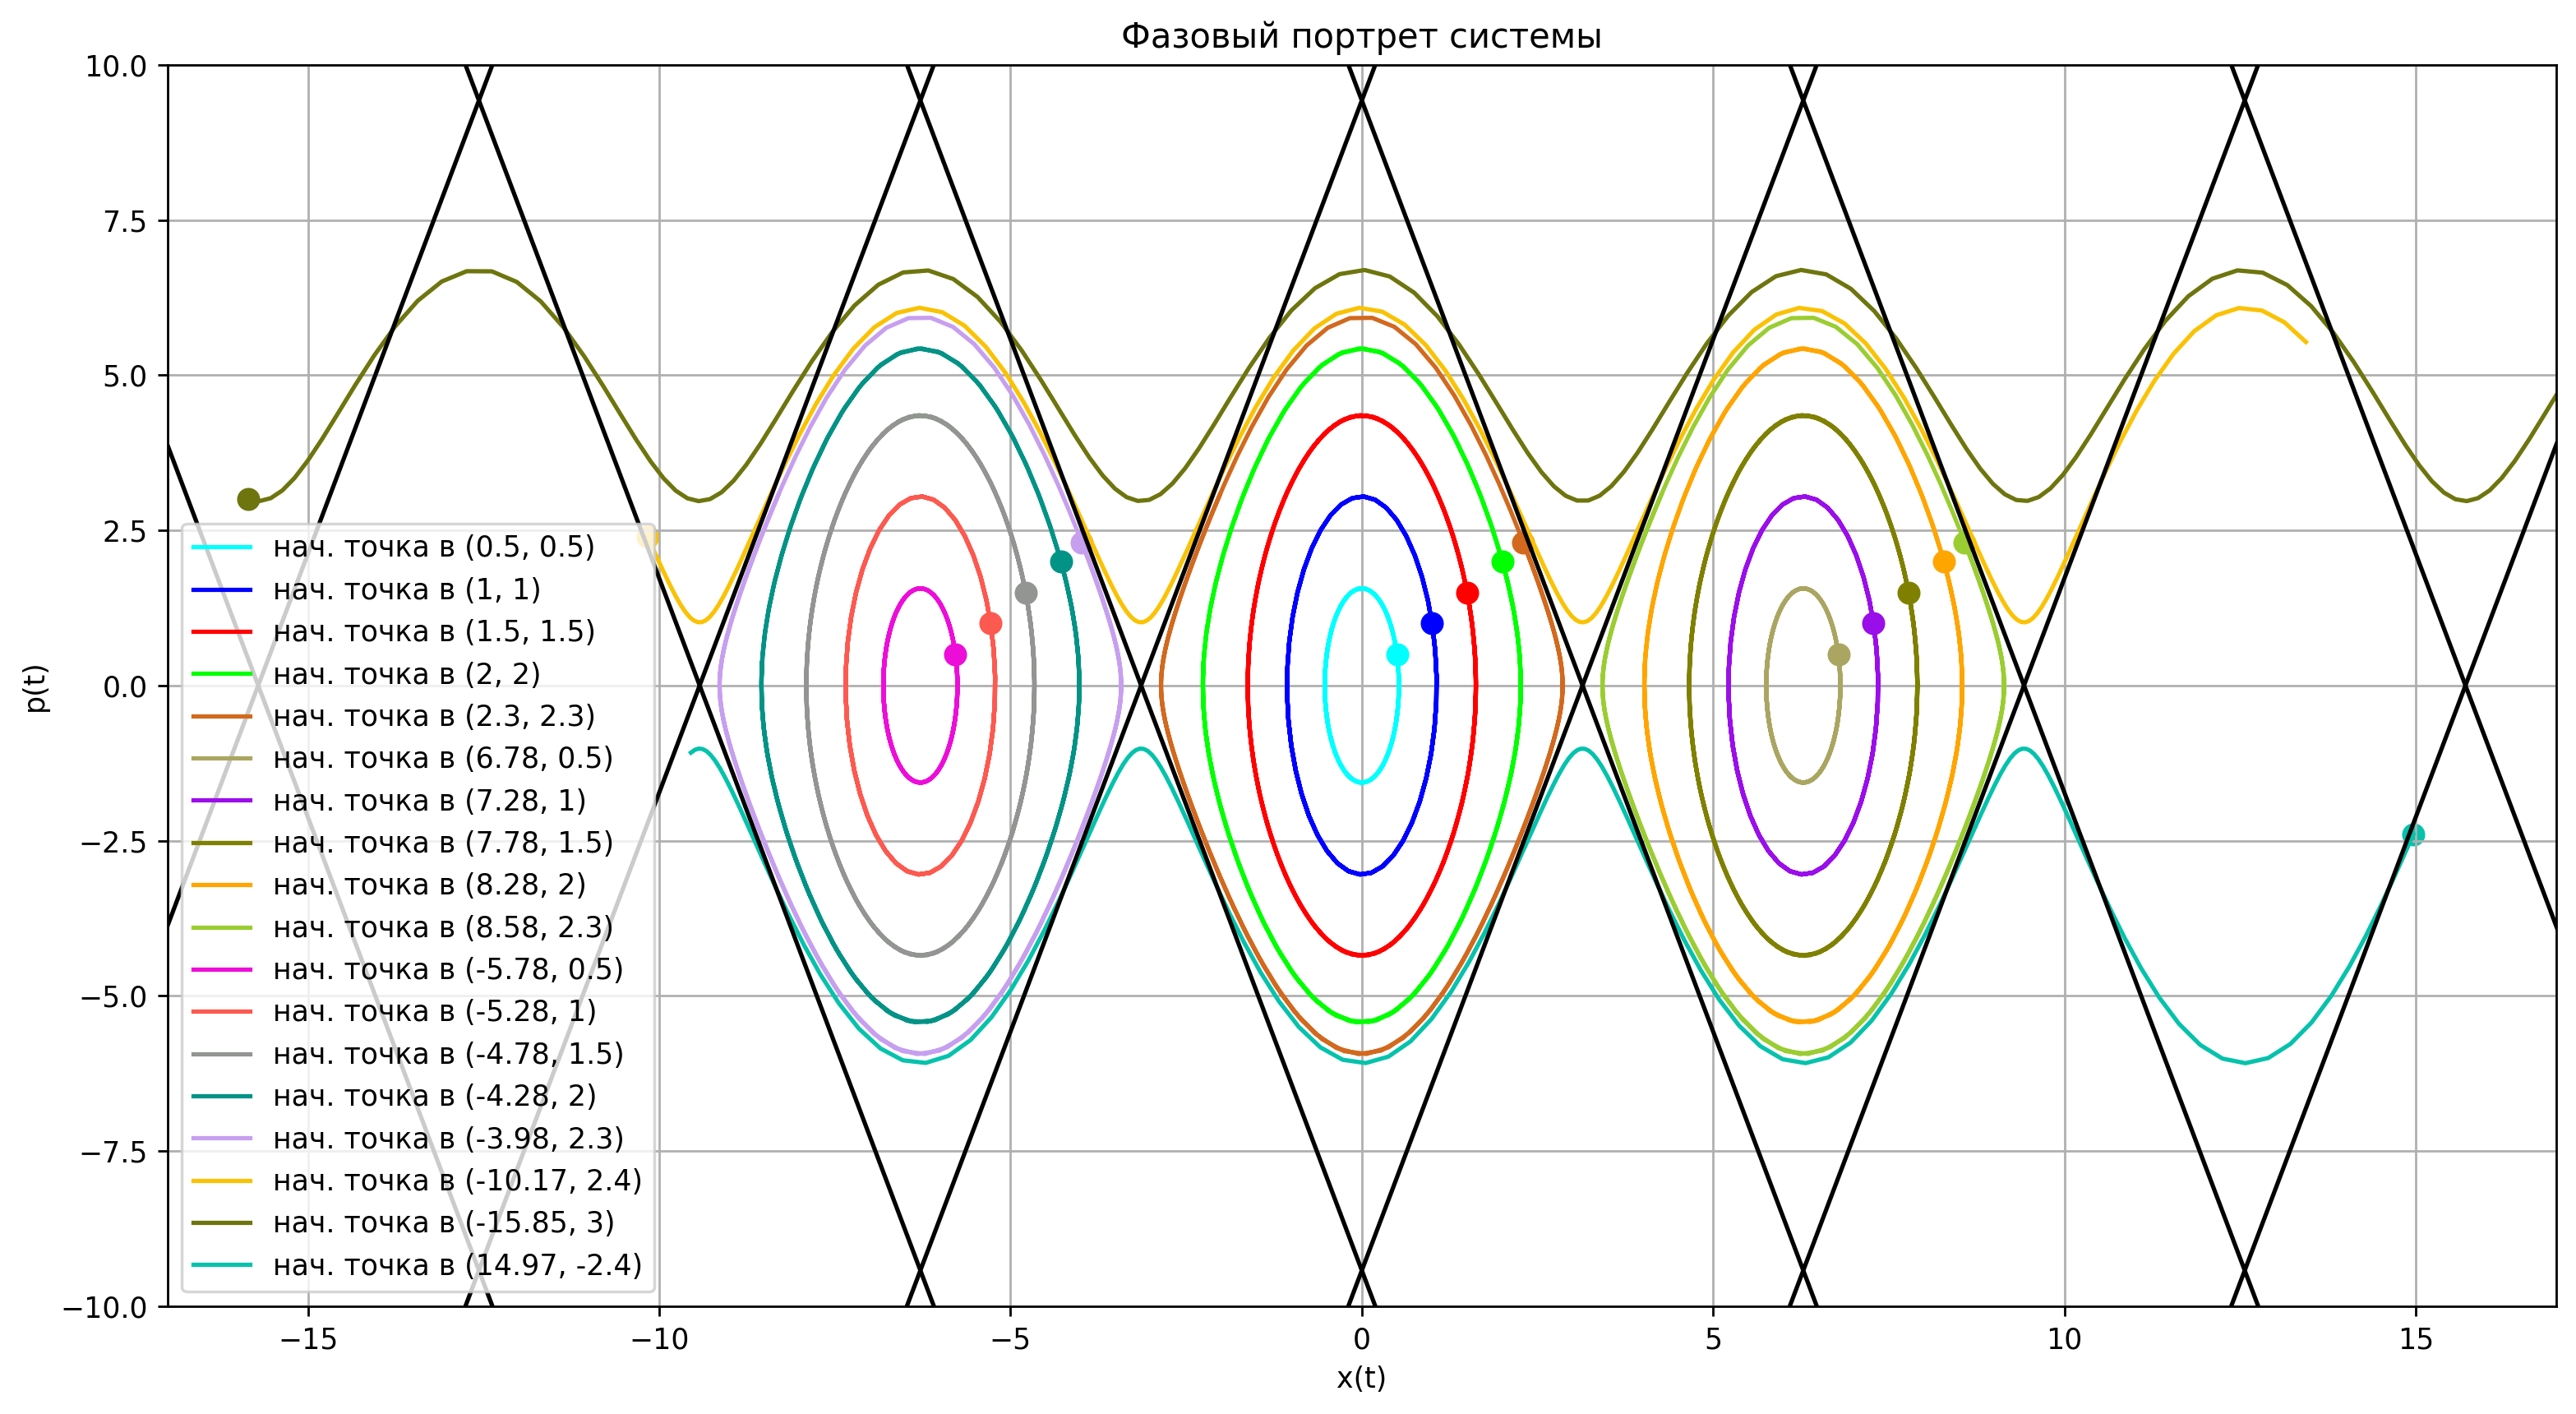

In [76]:
fig = plt.figure(facecolor="white", figsize=(15, 8), dpi=250)

# Линии фазового портрета системы
for line_number in range(len(y0_init)):
    # Из коллекции решений выбираем по-одному
    y1 = W_global[line_number][:, 0]
    y2 = W_global[line_number][:, 1]
    # Рисуем линию
    plt.plot(y1, y2, c = colors[line_number], 
                    label = ("нач. точка в (" + 
                              str(round(y0_init[line_number][0], 2)) + ", " +
                              str(round(y0_init[line_number][1], 2)) + ")"))
    # Отмечаем начальную точку на графике
    plt.scatter(y1[0], y2[0], c = colors[line_number], s = 50)

intercepts = [-5 * np.pi, -3 * np.pi, -np.pi, np.pi, 3 * np.pi, 5 * np.pi]
for interc in intercepts:
    abline(omega0, omega0 * interc)
    abline(-omega0, -omega0 * interc)

# Подписи к графику
plt.xlabel("x(t)")
plt.ylabel("p(t)")
plt.title("Фазовый портрет системы")
plt.legend()
plt.xlim((-17, 17))
plt.ylim((-10, 10))

plt.grid(True)
plt.show()

### Часть 3. Ангармонический осциллятор с трением

Дифференциальное уравнение ангармонического осциллятора с трением:

$$
\overset{\cdot \cdot}{x} + 2 \delta \overset{\cdot}{x} + \omega^2 x = 0
$$

Следовательно динамическая система для такого осциллятора может быть записана в виде:

$$
\begin{array}{c}
\cfrac{dx}{dt} = p\\
\cfrac{dp}{dt} = - 2 \delta p - \omega^2 x
\end{array}
$$

Матрица системы будет иметь следующий вид:

$$
A = \left(
        \begin{array} {cc}
        0 & 1 \\
        -2 \delta & -\omega^2
        \end{array}
    \right)
$$

In [77]:
# Сетка начальных точек системы для задачи Коши
x = list(range(-2, 3, 1))
y = list(range(-2, 3, 1))
y0_init = mesh(x, y)

# Зададим функцию системы
def f(y, t, omega = 1, delta = 0.5):
    y1, y2 = y
    return [y2, -2 * delta * y2 -1 * omega**2 * y1]

time = np.linspace(0, 8, 150)        # Вектор времени
omega0 = 1
delta0 = 0.5

W_global = []
# Решение системы
for y0 in y0_init:
    W_global.append(
        integr.odeint(f,            # Функция реализующая систему       
                      y0,           # Начальная точка
                      time,         # Вектор времени
                      (omega0, delta0)         # Дополнительный параметр omega и delta
                      )
    )

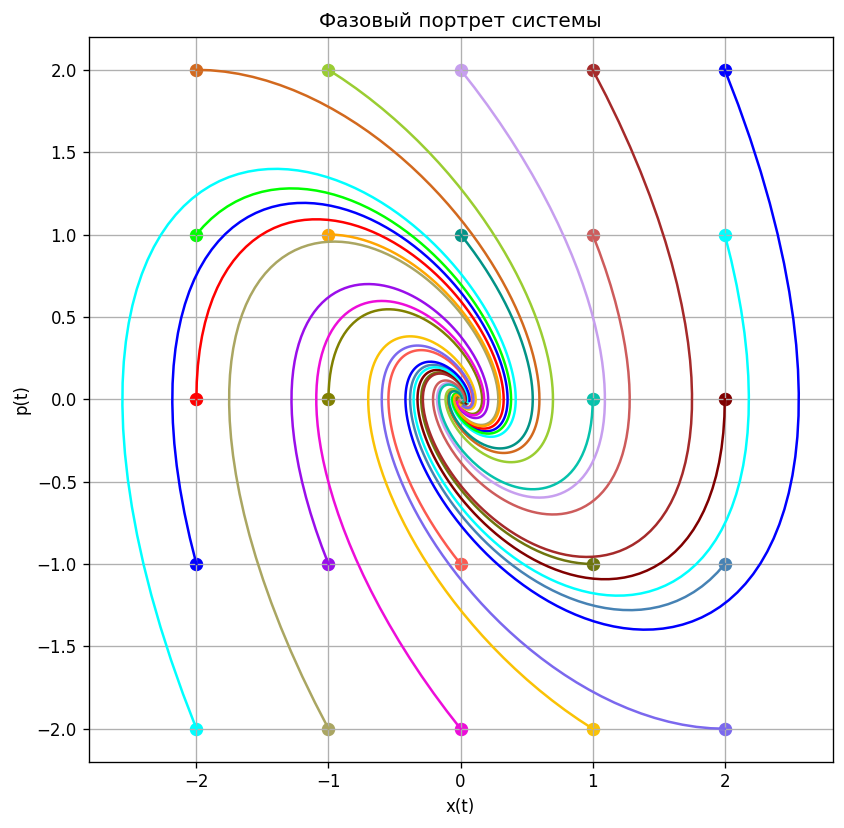

In [78]:
fig = plt.figure(facecolor="white", figsize=(8, 8), dpi=120)

# Линии фазового портрета системы
for line_number in range(len(y0_init)):
    # Из коллекции решений выбираем по-одному
    y1 = W_global[line_number][:, 0]
    y2 = W_global[line_number][:, 1]
    # Рисуем линию
    plt.plot(y1, y2, c = colors[line_number], 
                    label = ("(" + 
                              str(round(y0_init[line_number][0], 2)) + ", " +
                              str(round(y0_init[line_number][1], 2)) + ")"))
    # Отмечаем начальную точку на графике
    plt.scatter(y1[0], y2[0], c = colors[line_number], s = 50)

# Подписи к графику
plt.xlabel("x(t)")
plt.ylabel("p(t)")
plt.title("Фазовый портрет системы")
# plt.xlim((-17, 17))
# plt.ylim((-10, 10))

plt.grid(True)
plt.show()

### Часть 4. Гармонический осциллятор с трением

In [79]:
# Сетка начальных точек системы для задачи Коши
x = np.arange(-10, 11, 1.5)
y = np.arange(-7, 8, 3)
y0_init = mesh(x, y)

# Зададим функцию системы
def f(y, t, omega = 1, delta = 0.5):
    y1, y2 = y
    return [y2, -2 * delta * y2 -1 * omega**2 * np.sin(y1)]

time = np.linspace(0, 8, 150)        # Вектор времени
omega0 = 3
delta0 = 0.5

W_global = []
# Решение системы
for y0 in y0_init:
    W_global.append(
        integr.odeint(f,            # Функция реализующая систему       
                      y0,           # Начальная точка
                      time,         # Вектор времени
                      (omega0, delta0)         # Дополнительный параметр omega и delta
                      )
    )

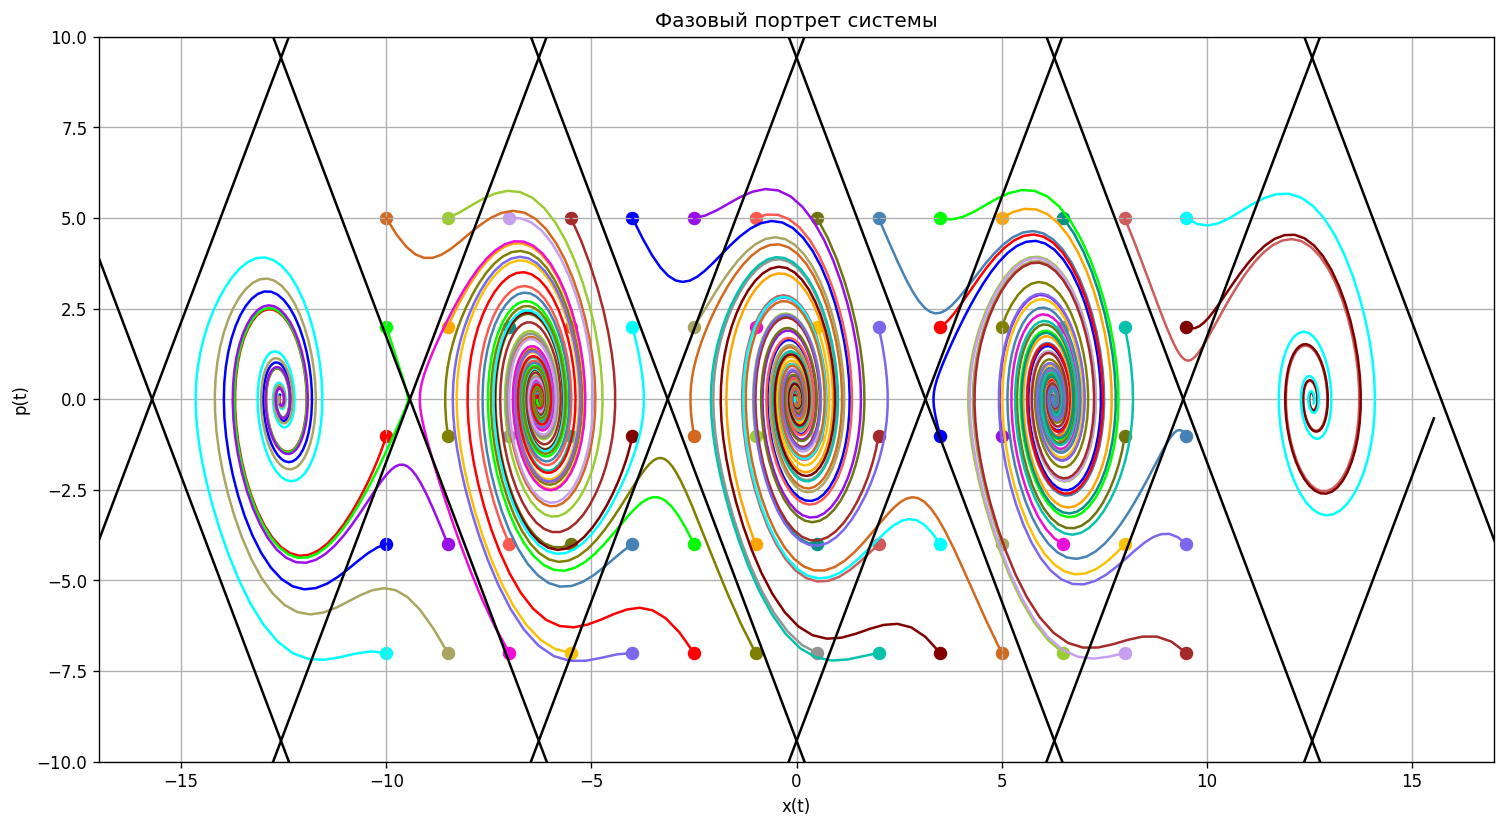

In [80]:
fig = plt.figure(facecolor="white", figsize=(15, 8), dpi=120)

# Линии фазового портрета системы
for line_number in range(len(y0_init)):
    # Из коллекции решений выбираем по-одному
    y1 = W_global[line_number][:, 0]
    y2 = W_global[line_number][:, 1]
    # Рисуем линию
    plt.plot(y1, y2, c = colors[line_number], 
                    label = ("(" + 
                              str(round(y0_init[line_number][0], 2)) + ", " +
                              str(round(y0_init[line_number][1], 2)) + ")"))
    # Отмечаем начальную точку на графике
    plt.scatter(y1[0], y2[0], c = colors[line_number], s = 50)

intercepts = [-5 * np.pi, -3 * np.pi, -np.pi, np.pi, 3 * np.pi, 5 * np.pi]
for interc in intercepts:
    abline(omega0, omega0 * interc)
    abline(-omega0, -omega0 * interc)

# Подписи к графику
plt.xlabel("x(t)")
plt.ylabel("p(t)")
plt.title("Фазовый портрет системы")
plt.xlim((-17, 17))
plt.ylim((-10, 10))

plt.grid(True)
plt.show()